# **TIME SERIES FORECASTING - MOVING AVERAGE MODEL (MA)**

Name: **MOVING AVERAGE MODEL (MA)**  
Date : 2022  
Author: Aurélien Vannieuwenhuyze  


<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licence Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under the terms of the <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License.</a>.
<hr/>

In [ ]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 32.6 MB/s 
     |████████████████████████████████| 9.9 MB 63.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pm

## **1: MOVING AVERAGE MODEL (MA)**

$$y_t = \mu + \epsilon_t + \beta_1*\epsilon_{t-1} + ... +\beta_n*\epsilon_{t-n}$$

$\epsilon_t$ are white noise error terms

This means that $y_t$ is predict with past **forecast errors**

Of course, we do not observe the values of $\epsilon_t$, so it is not really a regression in the usual sense

###1.1: Generate a white noise

In [ ]:
#residuals = np.random.normal(0,1,300)



In [ ]:
# For pedagogical use (reproducibility of results)

residuals = [-0.50256266,0.43027412,0.73085197,-0.47276001,-1.48633212,1.11903908,
 -0.0309586,  -0.64276488, -2.192442,    0.17525431,  2.1507574,   0.09429251,
 -0.03479668, -0.28323999,  0.34588674, -0.28936094, -0.1303969,   0.08103719,
  0.78441178, -0.33041329,  0.55599961,  0.01838772,  1.70103713, -0.62258121,
 -0.98907041,  2.60299486, -0.70108389,  1.49965413, -0.38493463, -0.08481062,
  1.42612213, -0.82759996, -0.74179091, -0.52729802,  1.53925386,  1.19857315,
 -0.52910661, -0.69434029,  0.16714083,  0.39097499,  0.71728422, -0.11571672,
 -0.26521098,  0.33160534, -0.16558111,  0.26403219, -0.8066123,   0.87211936,
 -0.18561617,  1.2032679,   0.59401337,  0.31243861,  0.63872195,  0.80498379,
 -0.41779467,  1.219304,   -0.35188157, -0.54277114, -0.05301528, -2.04315044,
  0.45394602, -1.03302153, -0.96004825,  0.1753169,  -0.59845705, -0.51678902,
 -1.85324489,  0.26044955,  0.41041643, -2.40995091,  0.66531357,  0.96775183,
  0.31844735, -0.10079273,  0.3687068,   0.64460897,  0.216946,   -0.83890848,
  0.37532661, -0.66984047, -0.1546306,   0.23206273,  2.2673744,   0.5169247,
 -0.0546717,  -0.76145368, -0.02570407,  0.23164699,  0.85590293, -0.27328277,
  0.85949766, -0.0295608,  -0.1902358,  -0.75609755, -2.59743788, -0.21929302,
  1.01117945,  0.91636979,  1.15150744,  0.19905012, -0.74230441, -1.23148936,
  2.28840336, -1.97483718,  1.08186489, -0.15596137,  0.71107201,  0.28264859,
 -0.28896843, -0.76514299, -0.79855357,  1.4113068,  -1.42642535, -1.81757681,
 -0.59385777, -0.32698552, -0.29118782,  1.21529363, -1.24559383, -1.02362816,
 -0.46999645, -0.36355394, -0.17616867,  0.91733493,  0.2704133,   1.91348195,
 -0.73725153,  1.50397895, -2.78691751, -0.62787392,  0.4328527,  -0.71740234,
 -1.07542271,  0.90697355,  1.89434544, -0.75662288, -0.5501771,  -0.68126127,
  1.29456469,  0.14800891,  0.1793736,  -0.3912844,  -0.59201555, -1.18882388,
 -1.55156561, -1.19903019,  0.86090875, -0.44994883, -0.57227353, -1.79201712,
  0.70937638, -0.90028465, -0.10706259, -0.52286331, -0.44867613, -0.21213301,
 -0.05554946, -0.85559942, -1.71714292,  0.27262037,  1.09975164, -2.26882886,
 -1.08837186, -1.20386526, -1.42355363, -1.77290493, -1.11714297, -0.58613784,
 -3.07464457, -0.62109489, -1.3552871,   0.82743526,  0.65360525,  0.6124229,
  1.16110469, -0.93784006,  0.94186574, -0.4372427,   2.2246509,  -0.53859549,
 -1.06643594,  1.22647251,  0.25132139,  1.42765626,  0.44399366,  1.22647492,
 -1.66154681,  1.17627285,  1.02046833, -0.8844352,  -0.52204421, -0.21677072,
 -0.58037586,  1.11785485,  0.5557222,   0.46799546, -1.29830801, -2.34181206,
 -0.27179751, -0.88640785]

###1.2: Generate Time Series

$$y_t = 6 + \epsilon_t + 0.3*\epsilon_{t-1} +0.5*\epsilon_{t-2}$$

In [ ]:
Yt = []
mu = 6
beta_1 = 0.3
beta_2 = 0.5
Yt.append(0)
Yt.append(0)
for i in range(2,len(residuals)):
  res = residuals[i]
  res_1 = residuals[i-1]
  res_2 = residuals[i-2]

  Yt.append(mu + res + beta_1*res_1 + beta_2*res_2)



In [ ]:
np.mean(Yt)

5.765088952495001

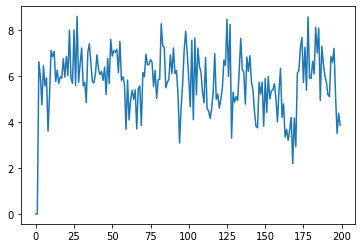

In [ ]:
plt.plot(Yt)
plt.show()

In [ ]:
ADF = adfuller(Yt)
print('ADF Statistic: %f' % ADF[0])

print('p-value: %f' % ADF[1])

if ADF[1] < 0.05:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -4.646761
p-value: 0.000106
Reject Ho - Time Series is Stationary


###1.3: Find the significant lag of autocorrelation with ACF

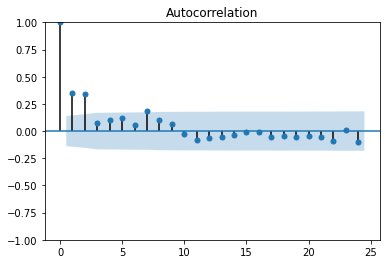

In [ ]:
plot_acf(np.array(Yt))
plt.show()

With ACF we can identified the order of MA process.  
In our case, we can say that the time series can be modeled by an **MA(2)**

###1.4: MA(q)

ACF helps us to identify the autocorrelation order of a temporal series.
$$q=2 \text{ in our case}$$

Once this order is identified, we can use it in a moving average model with this notation
$$MA(p)$$
$$MA(2)$$

**The errors of a time series cannot be observed.**

> Therefore **it is difficult to estimate them** with a linear regression algorithm as we did for the autoregression algorithm  
These algorithms (Maximum likelihood estimator for example) are a bit out of the context of time series, so we will not discuss them.

### 1.5: PMDArima (Library based on Stats model)

In [ ]:
significantLag = 2 #Found with ACF

The Arima function receives 3 parameters.   
- The first one has already been studied in the notebook dedicated to the AR model.
- The parameter d, will be seen later
- The parameter q corresponds to the autocorrelation lag determined with the ACF, it's the MA order

$$ARIMA(p,d,q)$$
$$p = \text{ AR order}$$
$$q = \text{ MA order}$$

In [ ]:
MA = pm.ARIMA(order=(0, 0,significantLag))
MA.fit(Yt)

ARIMA(order=(0, 0, 2))

In [ ]:
MA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  200
Model:               SARIMAX(0, 0, 2)   Log Likelihood                -312.948
Date:                Thu, 01 Dec 2022   AIC                            633.896
Time:                        08:12:57   BIC                            647.089
Sample:                             0   HQIC                           639.235
                                - 200                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.7277      0.157     36.486      0.000       5.420       6.035
ma.L1          0.3934      0.053      7.452      0.000       0.290       0.497
ma.L2          0.5136      0.059      8.761      0.000       0.399       0.628
sigma2         1.3340      0.106     12.617      0.000       1.127       1.541
===================================================================================
Ljung-Box (L1) (Q):                   1.21   Jarque-Bera (JB):                25.01
Prob(Q):                              0.27   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                            -0.35
Prob(H) (two-sided):                  0.13   Kurtosis:                         4.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Sigma2 ($\sigma^2$) is 'The variance of the residuals.'  

We can find the approximate values of the parameters we specified when generating the time series  
$\mu = 5.9773$
$\beta_1 = 0.3526$
$\beta_2 = 0.4372$

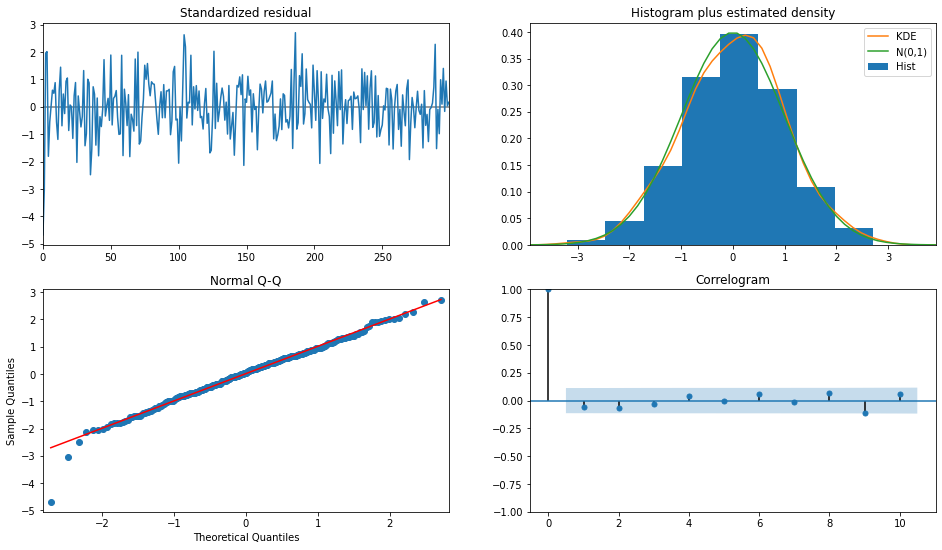

In [ ]:
fig = plt.figure(figsize=(16, 9))
MA.plot_diagnostics(fig=fig)
plt.show()

In [ ]:
predictions = MA.predict_in_sample(start=0,end=300)

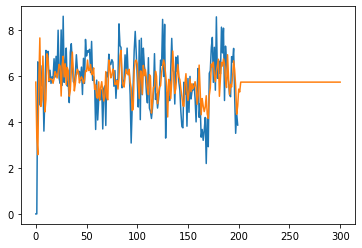

In [ ]:
plt.plot(Yt)
plt.plot(predictions)
plt.show()